<a href="https://colab.research.google.com/github/jlopez00001/M-todos-num-ricos/blob/main/M%C3%A9todos_num%C3%A9ricos_2parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Algoritmo 3.1 (INTERPOLACIÓN ITERADA DE NEVILLE)

In [ ]:
from tabulate import tabulate    # está libreria es para tabular

def neville(x_puntos, y_puntos, x): # la esta función toma como parametros los puntos y el valor a aproximar

    n = len(x_puntos)                    # n guarda el tamaño de la lista , que sera el grado del polinomio
    Q = [[0.0 for _ in range(n)] for _ in range(n)]   # definimo la matriz Q llenadolo con ceros

    for i in range(n):
        Q[i][0] = y_puntos[i]    # rrecorremos cada punto de interpolación
        for j in range(1, i + 1): # es te for recorre los segundos indices para en la formula de neville
             Q[i][j] = ((x - x_puntos[i - j]) * Q[i][j - 1] -
                       (x - x_puntos[i]) * Q[i - 1][j - 1]) / \
                      (x_puntos[i] - x_puntos[i - j])



    # Preparar tabla para impresión
    cabeseras = [f"Q(i,{j})" for j in range(n)]  # etiquetamos las columnas
    tabla = []                                  # definimos una lista llamda tabla
    for i in range(n):                          # recorremos cada primer indice
        fila = []                                # definimos una lista llamada fila
        for j in range(n):                      # segundo indice de la matriz
            if j <= i:                          # pregunta si el segundo indice es mayor o igual al primero
                fila.append(f"{Q[i][j]:.6f}")    # si es asi agregamos a la fila
            else:                                 # si no agrega nada
                fila.append("")
        tabla.append(fila)                       # agremos a nuestra tabla la fila correspondiente

    print("\nTabla de Neville:")                  # letrero
    print(tabulate(tabla, headers=cabeseras, showindex=[f"x = {x_puntos[i]}" for i in range(n)], tablefmt="grid")) # mostrar resultados

    print(f"\nAproximación de f({x}) = {Q[n - 1][n - 1]:.10f}") # mostramos el resultado de la aproximación de f en x
    return Q[n - 1][n - 1]



x_vals = [1.0, 1.3, 1.6, 1.9, 2.2]                             # componenetes en x
y_vals = [0.7651977, 0.620086, 0.455402, 0.281818, 0.110362]   # componeentes en y
x_interp = 1.5                                                  # valor a interpolar

resultado = neville(x_vals, y_vals, x_interp)       # llamamos a la función








Tabla de Neville:
+---------+----------+----------+----------+----------+----------+
|         |   Q(i,0) | Q(i,1)   | Q(i,2)   | Q(i,3)   | Q(i,4)   |
+=========+==========+==========+==========+==========+==========+
| x = 1.0 | 0.765198 |          |          |          |          |
+---------+----------+----------+----------+----------+----------+
| x = 1.3 | 0.620086 | 0.523345 |          |          |          |
+---------+----------+----------+----------+----------+----------+
| x = 1.6 | 0.455402 | 0.510297 | 0.512471 |          |          |
+---------+----------+----------+----------+----------+----------+
| x = 1.9 | 0.281818 | 0.513263 | 0.511286 | 0.511813 |          |
+---------+----------+----------+----------+----------+----------+
| x = 2.2 | 0.110362 | 0.510426 | 0.513736 | 0.511830 | 0.511820 |
+---------+----------+----------+----------+----------+----------+

Aproximación de f(1.5) = 0.5118199016


 Algoritmo 3.2 (DIFERENCIAS DIVIDIDAS DE NEWTON)

In [ ]:
from tabulate import tabulate         # es para la tabla

def diferencias_divididas_newton(x_puntos, y_puntos):  # función principal recibe como parametros dos listas de valores

    n = len(x_puntos)                       # obtenemos el grado del polinomio
    F = [[0.0 for _ in range(n)] for _ in range(n)]    # definimos una matriz


    for i in range(n):                  # llenamos la primera columna de la matriz que corresponde a los valors de y
        F[i][0] = y_puntos[i]


    for j in range(1, n):                  # Llenar la tabla triangular, recoremos los cada uno de los primeros indices
        for i in range(j, n):              # recorremos los segundos indices
            F[i][j] = (F[i][j - 1] - F[i - 1][j - 1]) / (x_puntos[i] - x_puntos[i - j])     # formula de difrencias divididas


    coeficientes = [F[i][i] for i in range(n)]   # Extraemos los coeficientes del polinomio (diagonal superior)

    # Preparar tabla para imprimir
    encabesados = [f"f[x0,{','.join(['x'+str(k) for k in range(j+1)])}]" for j in range(n)]
    tabla = []                           # definimos la tabla como una lista
    for i in range(n):
        fila = []                        # definimos la una lista llamda fila
        for j in range(n):
            if j <= i:                   # pregunta si el segundo indice es mayor que el primero
                fila.append(f"{F[i][j]:.6f}") # en ese caso a grega a la fila
            else:
                fila.append("")       # en caso contrario lo deja vacio
        tabla.append(fila)              # agregamos a la tabla las filas correspondientes

    print("\nTabla de Diferencias Divididas de Newton:")
    print(tabulate(tabla, headers=encabesados, showindex=[f"x = {x_puntos[i]}" for i in range(n)], tablefmt="grid"))

    return coeficientes       # devuelve los coeficentes del polinomio

x_vals = [1.0, 1.3, 1.6, 1.9, 2.2]            # datos de prueba
y_vals = [0.7651977, 0.620086, 0.455402, 0.281818, 0.110362]

coef = diferencias_divididas_newton(x_vals, y_vals) # llamos a la función





Tabla de Diferencias Divididas de Newton:
+---------+------------+---------------+------------------+---------------------+------------------------+
|         |   f[x0,x0] | f[x0,x0,x1]   | f[x0,x0,x1,x2]   | f[x0,x0,x1,x2,x3]   | f[x0,x0,x1,x2,x3,x4]   |
+=========+============+===============+==================+=====================+========================+
| x = 1.0 |   0.765198 |               |                  |                     |                        |
+---------+------------+---------------+------------------+---------------------+------------------------+
| x = 1.3 |   0.620086 | -0.483706     |                  |                     |                        |
+---------+------------+---------------+------------------+---------------------+------------------------+
| x = 1.6 |   0.455402 | -0.548947     | -0.108735        |                     |                        |
+---------+------------+---------------+------------------+---------------------+--------------------

Algoritmo 3.3 ( Interpolación de Hermite)

In [ ]:
import numpy as np
import pandas as pd
from sympy import symbols, simplify

def interpolacion_hermite(x_puntos, f, df): # función principal que toma como hargumentos tres listas de valores los puntos x0,x1,...xn , f(x0),f(x1),...f(xn) y las derivadas en esos puntos
  n = len(x_puntos)                       # obtenemos el tamaño de del arreglo que guarda los puntos x0,,x1,..,xn
  z = np.zeros(2 *n)                      # declasramos un arrelo deceros de tamño 2*n
  Q = np.zeros((2 * n, 2 * n))            # declaramos una matriz llendolo conceros de tamaño 2*n x 2*n

  for i in range(n):                      # llenamos la matriz con los datos correspondientes
    z[2 * i] = x_puntos[i]
    z[ 2* i + 1] = x_puntos[i]
    Q[2*i][0] = f[i]
    Q[ 2*i +1][0] =f[i]
    Q[2*i +1][1] = df[i]

    if i!= 0:                        # preguntamos si i es distinto de cero
      Q[2*i][1] = (Q[2*i][0] - Q[2*i-1][0]) / (z[2*i] - z[2*i-1])  # en ese caso calcula Q[2*i,1]

  for j in range (2,2*n):
    for i in range(j,2*n):
      Q[i][j] = (Q[i][j-1] - Q[i-1][j-1]) / (z[i] - z[i-j])



  # crear tabla
  columnas = [f"Q_{i}" for i in range(2*n)]
  def_Q = pd.DataFrame(Q, columns=columnas)
  def_Q.insert(0, "z", z)

  # obtengamos el polinomio este se construye con los elementos de la diagonal de la matriz
  coeficientes = []
  for i in range(2*n):
    coeficientes.append(Q[i][i])
  coeficientes.reverse()
  x = symbols('x')
  grado = len(coeficientes) -1
  polinomio = sum(coef * x**(grado - i) for i, coef in enumerate(coeficientes))
  print(simplify(polinomio))
  return def_Q

# datos de ejemplo
x_puntos = [1.3,1.6,1.9]
f = [0.620086, 0.4554022, 0.2818186]
df = [-0.5220232, -0.56989559, -0.5811571]

tabla = interpolacion_hermite(x_puntos, f, df)
print(tabla.round(6))


-0.00273641975305078*x**5 + 0.00265518518518057*x**4 + 0.0663690000000006*x**3 - 0.0897426666666667*x**2 - 0.5220232*x + 0.620086
     z       Q_0       Q_1       Q_2       Q_3       Q_4       Q_5
0  1.3  0.620086  0.000000  0.000000  0.000000  0.000000  0.000000
1  1.3  0.620086 -0.522023  0.000000  0.000000  0.000000  0.000000
2  1.6  0.455402 -0.548946 -0.089743  0.000000  0.000000  0.000000
3  1.6  0.455402 -0.569896 -0.069832  0.066369  0.000000  0.000000
4  1.9  0.281819 -0.578612 -0.029055  0.067962  0.002655  0.000000
5  1.9  0.281819 -0.581157 -0.008484  0.068570  0.001013 -0.002736


Interpolación de newton y polinomio de Lagrange

Función original:
1/(25*x**2 + 1)

Polinomio de Lagrange:
                  8                     6                     4                ↪
53.6893005545836⋅x  - 102.815010562028⋅x  + 61.3672060920175⋅x  - 1.7763568394 ↪

↪           3                    2      
↪ 0025e-15⋅x  - 13.203034546112⋅x  + 1.0

Polinomio de Newton (diferencias divididas):
                  8                        7                     6             ↪
53.6893005545836⋅x  + 1.4210854715202e-14⋅x  - 102.815010562028⋅x  + 1.4210854 ↪

↪             5                     4                         3                ↪
↪ 715202e-14⋅x  + 61.3672060920175⋅x  - 1.77635683940025e-15⋅x  - 13.203034546 ↪

↪      2                               
↪ 112⋅x  - 5.55111512312578e-17⋅x + 1.0


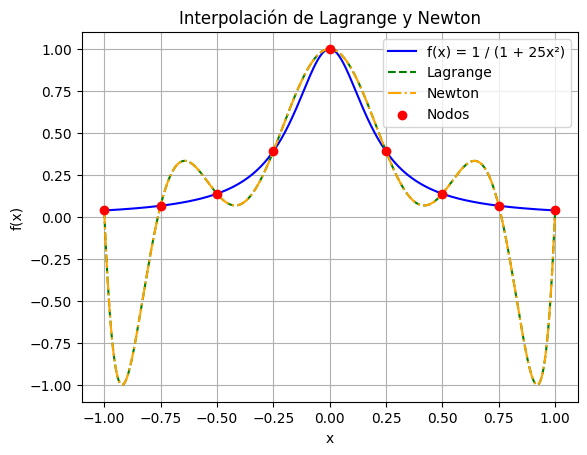

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# 1. Definir la variable simbólica
x = sp.Symbol('x')

# 2. Definir la función simbólica
f = (1 + 25 * x**2)**-1
print("Función original:")
print(f)

# 3. Convertir la función simbólica en función numérica
f_num = sp.lambdify(x, f, modules=['numpy'])

# 4. Crear nodos y valores
nodos_x = np.linspace(-1, 1, 9)
nodos_y = f_num(nodos_x)

# =====================
# 5. Interpolación de Lagrange
# =====================
lagrange_poly = 0
n = len(nodos_x)

for i in range(n):
    xi, yi = nodos_x[i], nodos_y[i]
    Li = 1
    for j in range(n):
        if j != i:
            Li *= (x - nodos_x[j]) / (xi - nodos_x[j])
    lagrange_poly += yi * Li

lagrange_poly = sp.simplify(sp.expand(lagrange_poly))
print("\nPolinomio de Lagrange:")
sp.pprint(lagrange_poly)

# =====================
# 6. Interpolación de Newton (diferencias divididas)
# =====================

def diferencias_divididas(x_vals, y_vals):
    n = len(x_vals)
    coef = list(y_vals.copy())
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            coef[i] = (coef[i] - coef[i - 1]) / (x_vals[i] - x_vals[i - j])
    return coef

# Obtener coeficientes
coeficientes = diferencias_divididas(nodos_x, nodos_y)

# Construir el polinomio de Newton
newton_poly = 0
for i in range(n):
    term = coeficientes[i]
    for j in range(i):
        term *= (x - nodos_x[j])
    newton_poly += term

newton_poly = sp.simplify(sp.expand(newton_poly))
print("\nPolinomio de Newton (diferencias divididas):")
sp.pprint(newton_poly)

# =====================
# 7. Funciones numéricas y evaluación
# =====================
x_vals = np.linspace(-1, 1, 400)
y_vals = f_num(x_vals)

lagrange_num = sp.lambdify(x, lagrange_poly, modules=['numpy'])
newton_num = sp.lambdify(x, newton_poly, modules=['numpy'])

y_lagrange = lagrange_num(x_vals)
y_newton = newton_num(x_vals)

# =====================
# 8. Graficar todo
# =====================
plt.plot(x_vals, y_vals, label='f(x) = 1 / (1 + 25x²)', color='blue')
plt.plot(x_vals, y_lagrange, label='Lagrange', color='green', linestyle='--')
plt.plot(x_vals, y_newton, label='Newton', color='orange', linestyle='-.')
plt.scatter(nodos_x, nodos_y, color='red', label='Nodos', zorder=5)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación de Lagrange y Newton')
plt.grid(True)
plt.legend()
plt.show()